![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


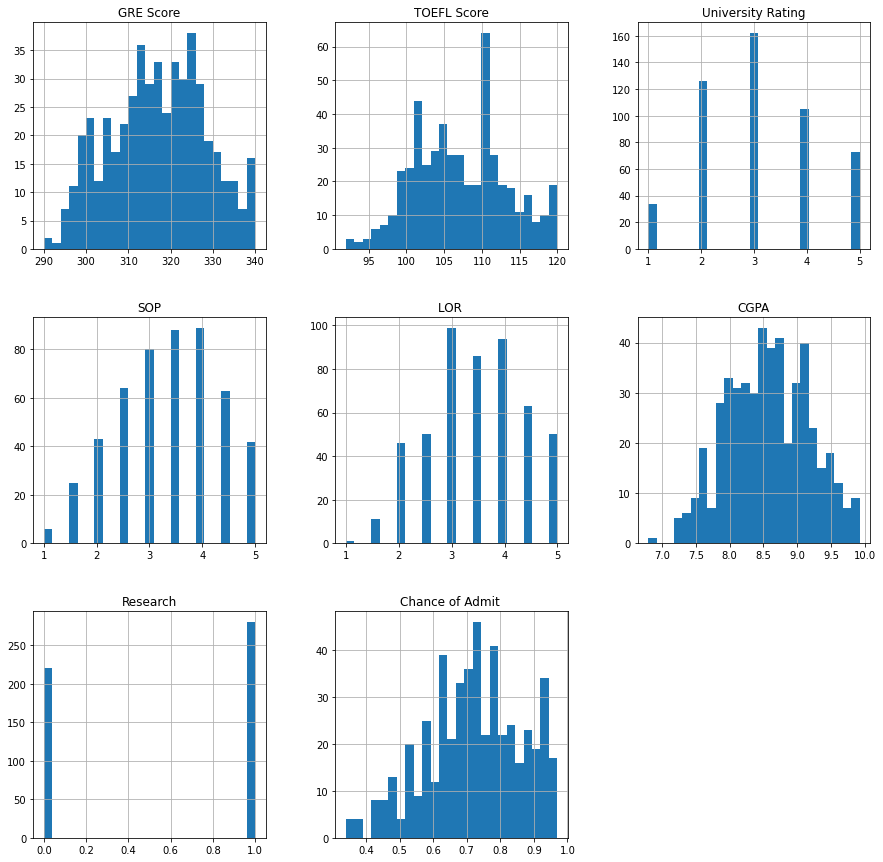

In [9]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [10]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [12]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=0)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
#Primero escalamos las variables predictoras de train y test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
ytrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [61]:
# Celda 1
#backend.clear_session()
NN1 = Sequential()
NN1.add(Dense(1, input_shape=(xTrain.shape[1],),activation='relu'))
NN1.compile(optimizer='sgd', loss='mean_squared_error')
print(NN1.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


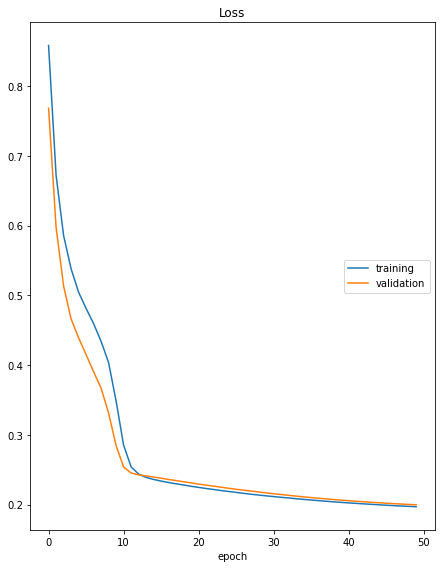

Loss
	training         	 (min:    0.197, max:    0.858, cur:    0.197)
	validation       	 (min:    0.200, max:    0.768, cur:    0.200)
11/11 [==============================] - 1s 64ms/step - loss: 0.1970 - val_loss: 0.1998


In [62]:
from livelossplot import PlotLossesKeras

NN1.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [63]:
ypredTrNN1 = NN1.predict(xTrain)
ypredNN1 = NN1.predict(xTest)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

mseNN1 = mse(yTest,ypredNN1)
mseTrNN1 = mse(yTrain,ypredTrNN1)

maeNN1 = mae(yTest,ypredNN1)
maeTrNN1 = mae(yTrain,ypredTrNN1)

print(f'\nEl MSE de la red neuronal de una capa es: {mseNN1: 2f}')
print(f'El MSE de la red neuronal de una capa en los datos de train es: {mseTrNN1: 2f}')

print(f'\nEl MAE de la red neuronal de una capa es: {maeNN1: 2f}')
print(f'El MAE de la red neuronal de una capa en los datos de train es: {maeTrNN1: 2f}')

5/5 [==============================] - 0s 4ms/step

El MSE de la red neuronal de una capa es:  0.199824
El MSE de la red neuronal de una capa en los datos de train es:  0.196681

El MAE de la red neuronal de una capa es:  0.356358
El MAE de la red neuronal de una capa en los datos de train es:  0.348489


- Para el entrenamiento de la red neuronal de una sola capa se especifica como optimizador Stochastic Gradiente Descentente (sgd), el cual utiliza una muestra aleatoria de los datos de entrenamiento; entre sus ventajas se encuentra que es más eficiente computacionalmente puesto que introduce aleatoriedad para el cálculo de los gradientes.


- En cuanto a la función de pérdida se utiliza el Error Cuadrático Medio al tratarse de un problema de regresión.  Por otro lado, para el número de épocas o iteraciones se consideraron 50, puesto que se encontró que en este valor el modelo se estabiliza. En este caso, la función de activación que se utiliza para la capa es “relu”.


- Por último, el Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE) se calcularon para ambos conjuntos de datos (entrenamiento y validación).

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [18]:
# Celda 2
NN2 = Sequential()
NN2.add(Dense(16, input_shape=(xTrain.shape[1],),activation='relu'))
NN2.add(Dense(1))
NN2.compile(optimizer='sgd', loss='mean_squared_error')
print(NN2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                128       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


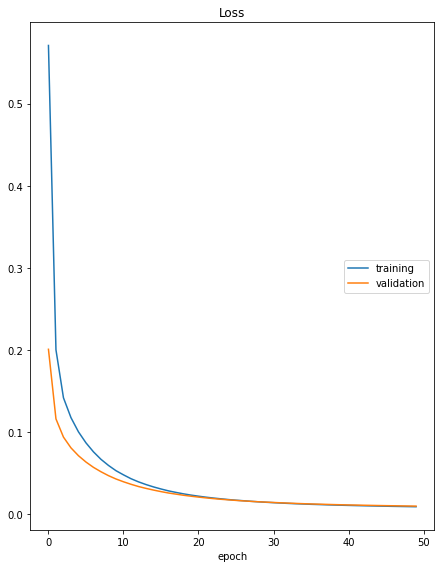

Loss
	training         	 (min:    0.009, max:    0.571, cur:    0.009)
	validation       	 (min:    0.010, max:    0.201, cur:    0.010)
11/11 [==============================] - 0s 16ms/step - loss: 0.0094 - val_loss: 0.0102


In [19]:
NN2.fit(xTrain, yTrain,
          verbose=1,
          epochs=50,
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [22]:
ypredTrNN2 = NN2.predict(xTrain)
ypredNN2 = NN2.predict(xTest)

mseNN2 = mse(yTest,ypredNN2)
mseTrNN2 = mse(yTrain,ypredTrNN2)

maeNN2 = mae(yTest,ypredNN2)
maeTrNN2 = mae(yTrain,ypredTrNN2)

print(f'\nEl MSE de la red neuronal de dos capas es: {mseNN2: 2f}')
print(f'El MSE de la red neuronal de dos capas en los datos de train es: {mseTrNN2: 2f}')

print(f'\nEl MAE de la red neuronal de dos capas es: {maeNN2: 2f}')
print(f'El MAE de la red neuronal de dos capas en los datos de train es: {maeTrNN2: 2f}')

5/5 [==============================] - 0s 1ms/step

El MSE de la red neuronal de dos capas es:  0.010188
El MSE de la red neuronal de dos capas en los datos de train es:  0.009325

El MAE de la red neuronal de dos capas es:  0.075369
El MAE de la red neuronal de dos capas en los datos de train es:  0.072420


- Teniendo en cuenta lo visto en el punto 1 se seleccionaron 30 épocas para correr la red neuronal, que con una sola capa convergió antes de las 50 épocas. Es así que realizando la corrida del modelo vemos converger al modelo entre las épocas 10 y 30, por otro lado se decidió un densidad de la capa oculta de 16, esto teniendo en cuenta tener más del doble de neuronas que variables predictoras, sin embargo se sabe que esto puede ser a discreción, vemos que con esta cantidad se converge rápidamente y da buenos resultados en el MSE y MAE, donde encontramos que no genera sobre ajuste en las predicciones al comparar las predicciones en Test y Train.

- También usamos como optimizador el Stochastic Gradient Descent (SGD), que nos da una buena convergencia y generalización, también comparándolo con el optimizador ADAM, que converge más rápido, obtenemos mejores resultados. Esto teniendo en cuenta la baja variabilidad de los resultados, sino se hubiera seleccionado ADAM. Por otro lado como función de perdida para el punto 2 escogimos MSE, teniendo en cuenta que es la métrica seleccionada para comparar los modelos y que queremos tener una métrica que nos mida la capacidad del modelo de acercarse a mejores predicciones.

- Por último tenemos como función de activación Rectified Linear Unit - ReLu, ya que queremos predecir una probabilidad que se dará en un rango entre 0 y 1, siendo esta la mejor opción para el problema de regresión que tenemos

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [73]:
# Celda 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
NN3 = Sequential()
NN3.add(Dense(20, input_shape=(xTrain.shape[1],),activation='relu'))
NN3.add(Dropout(0.5))
NN3.add(Dense(20, input_shape=(xTrain.shape[1],),activation='relu'))
NN3.add(Dropout(0.5))
NN3.add(Dense(1))
NN3.compile(optimizer='sgd', loss='mean_squared_error')
print(NN3.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                160       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

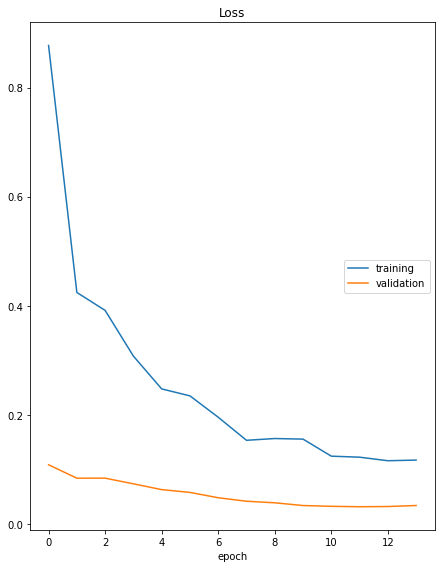

Loss
	training         	 (min:    0.116, max:    0.877, cur:    0.117)
	validation       	 (min:    0.031, max:    0.108, cur:    0.034)
11/11 [==============================] - 1s 64ms/step - loss: 0.1169 - val_loss: 0.0336
Epoch 14: early stopping


In [76]:
NN3.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

In [77]:
ypredTrNN3 = NN3.predict(xTrain)
ypredNN3 = NN3.predict(xTest)

mseNN3 = mse(yTest,ypredNN3)
mseTrNN3 = mse(yTrain,ypredTrNN3)

maeNN3 = mae(yTest,ypredNN3)
maeTrNN3 = mae(yTrain,ypredTrNN3)

print(f'\nEl MSE de la red neuronal de dos capas es: {mseNN3: 2f}')
print(f'El MSE de la red neuronal de dos capas en los datos de train es: {mseTrNN3: 2f}')

print(f'\nEl MAE de la red neuronal de dos capas es: {maeNN3: 2f}')
print(f'El MAE de la red neuronal de dos capas en los datos de train es: {maeTrNN3: 2f}')

5/5 [==============================] - 0s 4ms/step

El MSE de la red neuronal de dos capas es:  0.033609
El MSE de la red neuronal de dos capas en los datos de train es:  0.034209

El MAE de la red neuronal de dos capas es:  0.160684
El MAE de la red neuronal de dos capas en los datos de train es:  0.157397


- La arquitectura de esta red neuronal está compuesta de tres capas ocultas, en donde la forma de los datos de las dos primeras es igual al número de variables predictoras y están conectadas con 20 nodos (o unidades). Ambas utilizan la unidad lineal rectificada (relu) como función de activación. Por su parte, en la capa de salida se definió una unidad. Adicionalmente, entre las capas ocultas se agregó una capa Dropout con una tasa de 0.5 con el objetivo de eliminar aleatoriamente el 50% de las entradas.

- Luego de la construcción de la arquitectura de la red neuronal multicapa haciendo uso de la técnica de penalización Dropout, se compilo el modelo utilizando del gradiente descendente estocástico como algoritmo de optimización de la función de costo ya que trata de encontrar el mínimo global en la función de costos a partir de un parámetro lambda; y la función de pérdida que se definió fue el MSE debido a que se está trabajando con un problema de regresión.

- Por otro lado, con el fin de evitar problemas de sobreajuste al entrenar la red neuronal con los datos de muestra, se utilizó la función Early Stopping haciendo monitoreo en la pérdida de validación y definiendo una paciencia igual que 2 (lo cual permite continuar el entrenamiento dos épocas después de la primera parada). Para este caso, se establecieron 50 épocas ya que en este punto empieza a converger la pérdida entre entrenamiento y validación. Sin embargo, como se definió una detención temprana con la función Early Stopping, el entrenamiento se detuvo en la época 14, es decir, el modelo comenzará a sobreajustarse a partir de la época 15. Pero, como se estableció una paciencia igual que 2, el número óptimo de épocas para entrenar la mayoría de los conjuntos de datos es de 12.

- Finalmente, los valores del MSE que se obtuvieron al evaluar el modelo con los datos de entrenamiento y de prueba fueron de 0.0336 y 0.0342, respectivamente, mientras que los valores obtenidos al evaluar los mismos conjuntos pero con la métrica de predicción del MAE fueron de 0.1607 y 0.1574, respectivamente.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

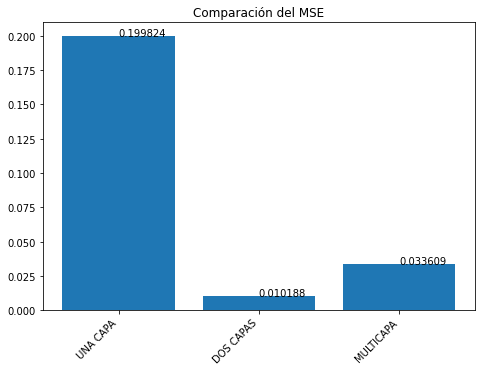

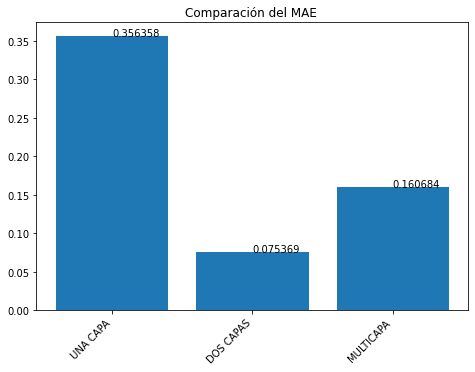

In [23]:
# Celda 4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación del MSE")
ejeX = ['Red Neuronal de una capa','Red Neuronal con dos capas', 'Red Neuronal multicapa con early stopping y dropout']
ejeY = [round(mseNN1, 6), round(mseNN2, 6), round(mseNN3, 6)]
ax.bar(ejeX,ejeY)
fig.autofmt_xdate(rotation=45)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación del MAE ")
ejeX = ['Red Neuronal de una capa','Red Neuronal con dos capas', 'Red Neuronal multicapa con early stopping y dropout']
ejeY = [round(maeNN1, 6), round(maeNN2, 6), round(maeNN3, 6)]
ax.bar(ejeX,ejeY)
fig.autofmt_xdate(rotation=45)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Ventajas  y Desventajas

- Aunque se halla observado en  la red neuronal de una sola capa que  el comportamiento  de la función de pérdida en validación y entrenamiento fue  a la baja, de forma convergente y al final estabilizada, esta no obtuvo el mejor desempeño de MSE y MAE  posiblemente porque la arquitectura de una red neuronal de una sola capa representa la forma más simple   y esto es una desventaja  con respecto a las redes multicapa que tienen una arquitectura más compleja, permitiendo más flexibilidad y  soluciones más robustas.


- Uno de los problemas del entrenamiento de las redes neuronales es la generalización. Este ocurre cuando un modelo se ajusta muy bien a los datos de entrenamiento, pero no tiene un buen rendimiento al usar en nuevos datos, produciéndose overfitting. El modelo de red de una sola capa no tiene configurado las funciones  early stopping y la técnica de penalización dropout, lo cual lo pone en desventaja con respecto al modelo multicapa donde se configuraron estos parámetros que permiten prevenir el sobre ajuste del modelo.


- Aunque para el modelo de 3 capas se utilizó la función Early Stopping y  la técnica de penalización Dropout  para evitar problemas de sobreajuste, este presentó menor desempeño que el modelo de dos capas, lo anterior posiblemente se debió a la configuración de los parámetros para  evitar sobreajuste del modelo disminuyendo el poder predictivo de este. También, el hecho de tener una arquitectura más compleja puede implicar tener un poco más de variabilidad en el comportamiento de la función de pérdida y no significa que vaya a tener un mejor desempeño.


- Como se observa en la gráfica es evidente el buen desempeño de los modelos multicapa con respecto al modelo de una capa, también se muestra que el modelo de dos capas tuvo el mejor desempeño, esto sugiere que la arquitectura de la red neuronal de dos capas con los parametros definidos fue suficiente y óptima para predecir la probabilidad de que un estudiante sea admitido por la universidad. 